In [12]:
import pandas as pd                 # To extract and use csv data
import numpy as np                  # Mathematical calculations
import matplotlib.pyplot as plt     # Visualisation through graphs

In [13]:
data1 = "Orientation_1/Accelerometer.csv"
df1 = pd.read_csv(data1)
dataset1 = df1.to_numpy()
ta, ax, ay, az = dataset1.T
print(ta[10])

data2 = "Orientation_1/Magnetometer.csv"
df2 = pd.read_csv(data2)
dataset2 = df2.to_numpy()
tm, mx, my, mz = dataset2.T
print(tm[10])

# Note that the sensors are not in sync

0.1017724167
0.1253764167


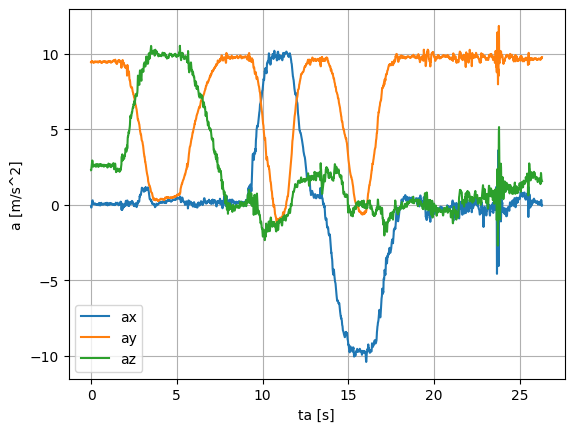

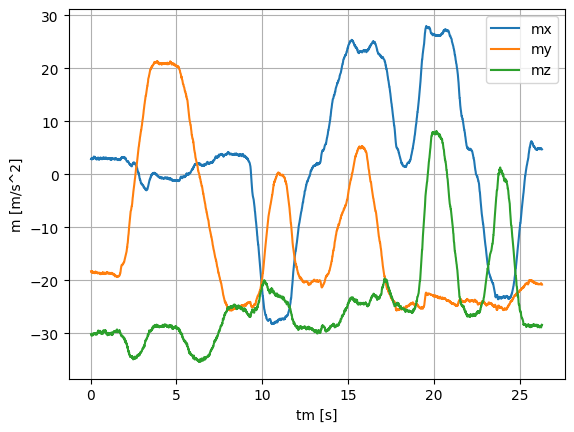

In [14]:
plt.xlabel("ta [s]")
plt.ylabel("a [m/s^2]")
plt.plot(ta, ax, label="ax")
plt.plot(ta, ay, label="ay")
plt.plot(ta, az, label="az")
plt.grid()
plt.legend()
plt.show()

plt.xlabel("tm [s]")
plt.ylabel("m [m/s^2]")
plt.plot(tm, mx, label="mx")
plt.plot(tm, my, label="my")
plt.plot(tm, mz, label="mz")
plt.grid()
plt.legend()
plt.show()

In [27]:
pitch = [0]
roll = [0]
yaw = [0]

a = np.sqrt(ax**2+ay**2+az**2)
axy = np.sqrt(ax**2+ay**2)
ayz = np.sqrt(ay**2+az**2)
axz = np.sqrt(ax**2+az**2)
pitch = np.arccos(az/ayz)*180/np.pi
roll = np.arccos(ay/axy)*180/np.pi

j=0
nx = [0] * len(tm)
ny = [0] * len(tm)
nz = [0] * len(tm)
c =  [0] * len(tm)
for i in range(len(tm)):
    while tm[i]>ta[j] and j<len(ta)-1 : j+=1
    c[i] = ax[j]*mx[i] + ay[j]*my[i] + az[j]*mz[i]
    nx[i] = mx[i]*(a[j]**2)-ax[j]*c[i]
    ny[i] = my[i]*(a[j]**2)-ay[j]*c[i]
    nz[i] = mz[i]*(a[j]**2)-az[j]*c[i]

nxy = np.sqrt(nx**2+ny**2)
nyz = np.sqrt(ny**2+nz**2)
nxz = np.sqrt(nx**2+nz**2)
bearing = np.arccos(nz/nxz)*180/np.pi

for i in np.arange(len(ta)-1):
    
    if ay[i]>0 : pitch[i]=pitch[i]*(-1)
    if pitch[i]>90 : pitch[i]=180-pitch[i]
    elif pitch[i]<-90 : pitch[i]=-180-pitch[i]
    # clockwise positive, anti-clockwise negative
    if ax[i]>0 : roll[i]=roll[i]*(-1)
    # yaw =  + [vz[-1] + (az[i]-9.88)*(t[i+1]-t[i])]
    if nx[i]>0 : bearing=bearing*(-1)+360


plt.plot(ta, roll, label="roll")
plt.xlabel("t [s]")
plt.ylabel("degrees")
plt.grid()
plt.legend()
plt.show()

plt.plot(ta, pitch, label="pitch")
plt.xlabel("t [s]")
plt.ylabel("degrees")
plt.grid()
plt.legend()
plt.show()


plt.plot(ta, bearing, label="bearing")
plt.xlabel("t [s]")
plt.ylabel("degrees")
plt.grid()
plt.legend()
plt.show()



TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [21]:
len(ta), len(tm)

(2646, 2644)

In [5]:
from vpython import *
plane = triangle(pos=vector(0,0,0), length = 0.10, thickness = 0.01, color=color.white, make_trail=False)

for i in range(len(t)):
    rate(100)
    rotate(plane, axis=(1,0,0), angle=pitch[t[i+1]]-pitch[t[i]], angle=vec(0,0,0))
    rotate(plane, axis=(0,1,0), angle=roll[t[i+1]]-roll[t[i]], angle=vec(0,0,0))
    while True: 
        pass

ModuleNotFoundError: No module named 'vpython'